In [18]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

In [19]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, noise=0.1, factor=0.2)

In [20]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y)
y_data = y_data.view(len(X), -1)

In [21]:
def scatter_plot(X, y):
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

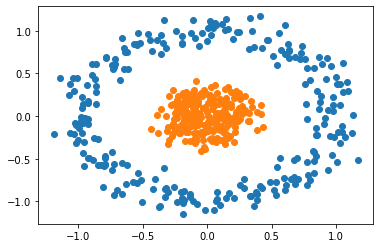

In [22]:
scatter_plot(X, y)

In [33]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [34]:
neural_net_model = Model(2, 4, 1)

In [35]:
print(list(neural_net_model.parameters()))

[Parameter containing:
tensor([[-0.3848, -0.4742],
        [-0.6931, -0.2805],
        [-0.3366,  0.2004],
        [-0.4021,  0.0640]], requires_grad=True), Parameter containing:
tensor([ 0.6442, -0.6192,  0.2389, -0.0265], requires_grad=True), Parameter containing:
tensor([[ 0.3939,  0.2925,  0.3186, -0.3774]], requires_grad=True), Parameter containing:
tensor([0.3145], requires_grad=True)]


In [36]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(neural_net_model.parameters(), lr=0.1)

In [37]:
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = neural_net_model.forward(x_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())
    print("epoch: ", i, "loss: ", loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0 loss:  0.7479391694068909
epoch:  1 loss:  0.706688404083252
epoch:  2 loss:  0.6931421160697937
epoch:  3 loss:  0.698597252368927
epoch:  4 loss:  0.7074742913246155
epoch:  5 loss:  0.7099769115447998
epoch:  6 loss:  0.7063252925872803
epoch:  7 loss:  0.7002593874931335
epoch:  8 loss:  0.6951218247413635
epoch:  9 loss:  0.6927186250686646
epoch:  10 loss:  0.6931539177894592
epoch:  11 loss:  0.6952250599861145
epoch:  12 loss:  0.697263777256012
epoch:  13 loss:  0.6980324983596802
epoch:  14 loss:  0.6971767544746399
epoch:  15 loss:  0.6951258778572083
epoch:  16 loss:  0.6926971673965454
epoch:  17 loss:  0.6906763315200806
epoch:  18 loss:  0.6895070672035217
epoch:  19 loss:  0.6891471147537231
epoch:  20 loss:  0.6891345381736755
epoch:  21 loss:  0.6888421177864075
epoch:  22 loss:  0.6877925395965576
epoch:  23 loss:  0.6858546733856201
epoch:  24 loss:  0.683232307434082
epoch:  25 loss:  0.6802923679351807
epoch:  26 loss:  0.6773505210876465
epoch:  27 loss

epoch:  312 loss:  0.009822765365242958
epoch:  313 loss:  0.009775334969162941
epoch:  314 loss:  0.00972828920930624
epoch:  315 loss:  0.00968162715435028
epoch:  316 loss:  0.00963534228503704
epoch:  317 loss:  0.009589429944753647
epoch:  318 loss:  0.0095438864082098
epoch:  319 loss:  0.00949870329350233
epoch:  320 loss:  0.009453886188566685
epoch:  321 loss:  0.009409422986209393
epoch:  322 loss:  0.009365307167172432
epoch:  323 loss:  0.00932154431939125
epoch:  324 loss:  0.009278126992285252
epoch:  325 loss:  0.009235044941306114
epoch:  326 loss:  0.00919230468571186
epoch:  327 loss:  0.009149891324341297
epoch:  328 loss:  0.009107813239097595
epoch:  329 loss:  0.009066061116755009
epoch:  330 loss:  0.00902462750673294
epoch:  331 loss:  0.008983513340353966
epoch:  332 loss:  0.008942709304392338
epoch:  333 loss:  0.008902223780751228
epoch:  334 loss:  0.008862043730914593
epoch:  335 loss:  0.00882217101752758
epoch:  336 loss:  0.008782599121332169
epoch:  33

epoch:  627 loss:  0.0034372429363429546
epoch:  628 loss:  0.003428972326219082
epoch:  629 loss:  0.0034207343123853207
epoch:  630 loss:  0.0034125277306884527
epoch:  631 loss:  0.0034043521154671907
epoch:  632 loss:  0.0033962083980441093
epoch:  633 loss:  0.003388095647096634
epoch:  634 loss:  0.0033800159581005573
epoch:  635 loss:  0.003371967701241374
epoch:  636 loss:  0.003363948781043291
epoch:  637 loss:  0.003355962922796607
epoch:  638 loss:  0.003348006634041667
epoch:  639 loss:  0.00334007921628654
epoch:  640 loss:  0.0033321857918053865
epoch:  641 loss:  0.0033243203070014715
epoch:  642 loss:  0.003316485555842519
epoch:  643 loss:  0.0033086829353123903
epoch:  644 loss:  0.0033009066246449947
epoch:  645 loss:  0.0032931652385741472
epoch:  646 loss:  0.003285446669906378
epoch:  647 loss:  0.0032777590677142143
epoch:  648 loss:  0.0032701033633202314
epoch:  649 loss:  0.003262472804635763
epoch:  650 loss:  0.003254873678088188
epoch:  651 loss:  0.0032473

epoch:  943 loss:  0.0018347088480368257
epoch:  944 loss:  0.0018316484056413174
epoch:  945 loss:  0.0018285899423062801
epoch:  946 loss:  0.001825544866733253
epoch:  947 loss:  0.0018225032836198807
epoch:  948 loss:  0.0018194722943007946
epoch:  949 loss:  0.0018164500361308455
epoch:  950 loss:  0.0018134344136342406
epoch:  951 loss:  0.0018104236805811524
epoch:  952 loss:  0.0018074216786772013
epoch:  953 loss:  0.001804429804906249
epoch:  954 loss:  0.0018014428205788136
epoch:  955 loss:  0.0017984658479690552
epoch:  956 loss:  0.001795495511032641
epoch:  957 loss:  0.0017925315769389272
epoch:  958 loss:  0.0017895771889016032
epoch:  959 loss:  0.001786629669368267
epoch:  960 loss:  0.0017836905317381024
epoch:  961 loss:  0.0017807557014748454
epoch:  962 loss:  0.0017778304172679782
epoch:  963 loss:  0.001774911186657846
epoch:  964 loss:  0.0017720027826726437
epoch:  965 loss:  0.001769096590578556
epoch:  966 loss:  0.001766200759448111
epoch:  967 loss:  0.00

Text(0, 0.5, 'loss')

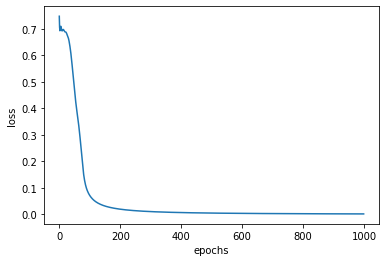

In [38]:
plt.plot(range(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')

In [39]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]), max(X[:, 0]))
    y_span = np.linspace(min(X[:, 1]), max(X[:, 1]))
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_flat = model.forward(grid)
    z = pred_flat.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)
    scatter_plot(X, y)

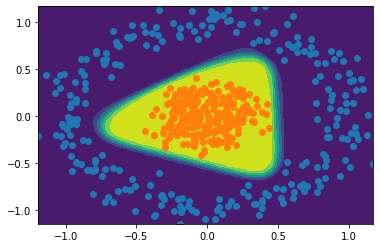

In [41]:
plot_decision_boundary(X, y, neural_net_model)